## Problem Statement

Sarcopenia is defined as age-related loss of skeletal muscle mass and function, which leads to significant amount of adverse health outcomes like increased risk of falls and fractures, physical frailty, mobility limitation, and even premature mortality.  

Besides, aging, smoking, physical inactivity, malnutrition and chronic comorbid diseases such as hypertension (HT), diabetes mellitus (DM), coronary artery disease (CAD), hyperlipidemia and obesity also have deteriorative effects on muscle mass and function.

Prevention of sarcopenia-related morbidity and mortality, among aging people in particular, depends on early detection and treatment, more importantly on unraveling the relationships between muscle loss, decline in muscle function and physical performance and the aforementioned potential predictor. 

This case study is about predicting if certain users will be developing Sarcopenia.  We are following a standard Machine learning pipeline as defined below.

- Exploratory data analysis
    - Check basic data information
    - Review the summary statistics
    - Check duplicates and handle if any
    - Check Null values and handle if any 
    - Data transformation
    - Visualization
    - Feature encoding for categorical variables
    - Separate into independent and dependent variables
    
- Split data into train and test sets
    - Data scaling
    - Variable selection using Lasso regression
    - Handling imbalanced data with SMOTE
- Save data into CSV format

- For the modelling part, we are using 4 different supervised machine learning algorithms followed by an Ensemble model. 

- For the model evaluations, we have used multiple metrics- accuracy, f1-score, recall, precision, confusion matrix and ROC_AUC curve.

## Dataset 

The dataset contains the information of users basic health information and various treatments/medications that they are under. 

## Exploratory Data Analysis

#### Load the libraries

In [1]:
import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Load dataset

In [2]:
df = pd.read_csv("DataSampled.csv")

In [3]:
#look at the top 5 rows
df.head()

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking (packet/year),Alcohol,DM,...,Exercise,LowCST,CST,Gait speed,Low grip strength,Grip strength,SARCOPENIA,STAR,BMI,Gender
0,NaN,64,66.0,155.0,89.0,104.0,0.0,0,0,0,...,0,0.0,8.1,1.28,0.0,28.0,0.0,1.00,27.40,F
1,NaN,53,55.0,150.0,77.0,97.0,0.0,0,0,0,...,NaN,0.0,8.0,1.47,1.0,16.0,0.0,1.84,24.40,F
2,24.0,56,56.0,150.0,112.0,125.0,0.0,0,0,0,...,0,0.0,11.7,0.80,0.0,23.0,0.0,1.48,36.00,F
3,NaN,58,75.0,160.0,113.0,NaN,0.0,0,0,1,...,0,1.0,18.0,1.34,0.0,23.0,0.0,1.12,29.30,F
4,30.0,55,72.0,157.0,98.0,104.0,1.0,4,0,0,...,1-2/week,NaN,10.9,1.09,NaN,21.0,0.0,1.45,29.21,F


In [4]:
#look at the bottom 5 rows
df.tail()

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking (packet/year),Alcohol,DM,...,Exercise,LowCST,CST,Gait speed,Low grip strength,Grip strength,SARCOPENIA,STAR,BMI,Gender
1298,30.0,73,80.0,162.0,103.0,107.0,1.0,50,0,1,...,0,0.0,8.7,0.92,1.0,30.0,1.0,1.31,30.5,M
1299,25.0,61,87.0,158.0,107.0,128.0,1.0,45,0,0,...,3-4/week,0.0,9.4,0.80,0.0,23.0,0.0,1.15,34.9,F
1300,29.0,66,70.0,166.0,96.0,101.0,1.0,46,social,0,...,0,0.0,8.3,1.22,1.0,29.0,1.0,1.15,25.4,M
1301,24.0,65,70.0,158.0,89.0,108.0,0.0,0,0,1,...,0,0.0,10.1,1.06,0.0,26.0,0.0,1.02,28.0,F
1302,30.0,63,86.0,160.0,112.0,126.0,1.0,30,0,1,...,1-2/week,NaN,4.8,0.88,NaN,24.0,0.0,0.93,33.6,F


##### Basic data check

In [5]:
#look at the number of rows and columns
df.shape

(1303, 39)

In [6]:
#check all the columns
df.columns

Index(['MMSE', 'Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking',
       ' Smoking (packet/year)', '  Alcohol', 'DM ', 'DM duration', 'İnsülin',
       ' DM drug', 'Hiperlipidemi', 'Dyslipidemia duration',
       'Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'KOAH', 'OP', 'Other(s)', 'HT', 'Anti-HT drug type', 'HT duration',
       'Education', 'Occupation', 'Working Status', 'Exercise', 'LowCST',
       'CST', 'Gait speed', 'Low grip strength', 'Grip strength', 'SARCOPENIA',
       'STAR', 'BMI', 'Gender'],
      dtype='object')

There are 1303 rows and 39 columns. 

Out of the 39 columns - "SARCOPENIA" is the target or dependent variable, 1.0 - refers to presence of disease, 0.0 - no disease.

Rest all 38 columns are the independent variables.

In [7]:
#check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MMSE                    812 non-null    float64
 1   Age                     1303 non-null   int64  
 2   Weight                  1302 non-null   float64
 3   Height                  1301 non-null   float64
 4   Waist                   1297 non-null   float64
 5   Hip                     1296 non-null   float64
 6   Smoking                 1302 non-null   float64
 7    Smoking (packet/year)  1301 non-null   object 
 8     Alcohol               1303 non-null   object 
 9   DM                      1303 non-null   int64  
 10  DM duration             1289 non-null   float64
 11  İnsülin                 1297 non-null   float64
 12   DM drug                379 non-null    object 
 13  Hiperlipidemi           1301 non-null   float64
 14  Dyslipidemia duration   1287 non-null   

As we can see, the data contains some null values, that needs to be handled. There are two types of numerical data in the dataframe — int64 and float64. The categorical data is mentioned against object datatype.

In [8]:
#computes and displays summary statistics on all of the numeric variables
df.describe()

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,DM,DM duration,İnsülin,...,HT,HT duration,LowCST,CST,Gait speed,Low grip strength,Grip strength,SARCOPENIA,STAR,BMI
count,812.000000,1303.000000,1302.000000,1301.000000,1297.000000,1296.000000,1302.000000,1303.000000,1289.000000,1297.000000,...,1303.000000,1261.000000,1113.000000,1303.000000,1300.000000,1166.000000,1303.000000,1302.000000,1295.000000,1301.000000
mean,27.519704,61.348427,76.849693,160.322513,99.747880,109.384645,0.321813,0.303147,2.850202,0.060910,...,0.634689,5.778699,0.318059,11.236761,0.988775,0.220412,26.947045,0.188940,1.226873,30.033651
std,2.767765,9.724303,13.701356,10.022912,12.568456,11.819345,0.467351,0.459795,6.048845,0.239257,...,0.481702,7.513770,0.465932,4.449019,0.281349,0.414702,9.291133,0.391611,0.308437,5.484643
min,13.000000,44.000000,42.000000,1.590000,58.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.100000,0.250000,0.000000,7.000000,0.000000,0.490000,15.800000
25%,27.000000,53.000000,68.000000,155.000000,92.000000,102.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.800000,0.780000,0.000000,20.000000,0.000000,1.005000,26.300000
50%,28.000000,61.000000,75.000000,160.000000,100.000000,108.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,10.500000,0.980000,0.000000,25.000000,0.000000,1.200000,29.330000
75%,30.000000,68.000000,85.000000,166.000000,108.000000,116.000000,1.000000,1.000000,2.000000,0.000000,...,1.000000,10.000000,1.000000,12.600000,1.170000,0.000000,32.000000,0.000000,1.420000,32.900000
max,30.000000,92.000000,150.000000,192.000000,152.000000,191.000000,1.000000,1.000000,40.000000,1.000000,...,1.000000,55.000000,1.000000,50.000000,2.410000,1.000000,77.000000,1.000000,2.330000,57.100000


We can see the below statistics for the numeric columns. If "Include=all" is specified, we can extract all this information about all columns.

- mean
- median
- standard deviation
- minimum
- maximum
- percentiles
- etc

In [9]:
#any duplicates
df.duplicated().any()

False

There are no duplicates in the data.

##### Handle missing value

In [10]:
#detect if any missing values
df.isnull().any()

MMSE                       True
Age                       False
Weight                     True
Height                     True
Waist                      True
Hip                        True
Smoking                    True
 Smoking (packet/year)     True
  Alcohol                 False
DM                        False
DM duration                True
İnsülin                    True
 DM drug                   True
Hiperlipidemi              True
Dyslipidemia duration      True
Dyslipidemia drugs         True
KAH                        True
KAH duration               True
Hipotiroidi                True
ASTIM                      True
KOAH                       True
OP                         True
Other(s)                   True
HT                        False
Anti-HT drug type          True
HT duration                True
Education                  True
Occupation                 True
Working Status             True
Exercise                   True
LowCST                     True
CST     

There are missing values for several columns.

In [11]:
#count the number of missing values
df.isnull().sum()

MMSE                       491
Age                          0
Weight                       1
Height                       2
Waist                        6
Hip                          7
Smoking                      1
 Smoking (packet/year)       2
  Alcohol                    0
DM                           0
DM duration                 14
İnsülin                      6
 DM drug                   924
Hiperlipidemi                2
Dyslipidemia duration       16
Dyslipidemia drugs        1072
KAH                         42
KAH duration                54
Hipotiroidi                 32
ASTIM                      123
KOAH                        78
OP                         948
Other(s)                  1018
HT                           0
Anti-HT drug type          553
HT duration                 42
Education                   20
Occupation                  64
Working Status              80
Exercise                    20
LowCST                     190
CST                          0
Gait spe

In [12]:
df.columns

Index(['MMSE', 'Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking',
       ' Smoking (packet/year)', '  Alcohol', 'DM ', 'DM duration', 'İnsülin',
       ' DM drug', 'Hiperlipidemi', 'Dyslipidemia duration',
       'Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'KOAH', 'OP', 'Other(s)', 'HT', 'Anti-HT drug type', 'HT duration',
       'Education', 'Occupation', 'Working Status', 'Exercise', 'LowCST',
       'CST', 'Gait speed', 'Low grip strength', 'Grip strength', 'SARCOPENIA',
       'STAR', 'BMI', 'Gender'],
      dtype='object')

In [13]:
#for the categorical variables, check the proportion of missing values
print("Percentage of missing values for DM drug              : ",len(df[df[' DM drug'].isnull()])/len(df)*100)
print("Percentage of missing values for Dyslipidemia drugs   : ",len(df[df['Dyslipidemia drugs '].isnull()])/len(df)*100)
print("Percentage of missing values for Other(s)             : ",len(df[df['Other(s)'].isnull()])/len(df)*100)
print("Percentage of missing values for Anti-HT drug type    : ",len(df[df['Anti-HT drug type'].isnull()])/len(df)*100)
print("Percentage of missing values for HT duration          : ",len(df[df['HT duration'].isnull()])/len(df)*100)
print("Percentage of missing values for Education            : ",len(df[df['Education'].isnull()])/len(df)*100)
print("Percentage of missing values for Occupation           : ",len(df[df['Occupation'].isnull()])/len(df)*100)
print("Percentage of missing values for Occupation           : ",len(df[df['Occupation'].isnull()])/len(df)*100)
print("Percentage of missing values for Exercise             : ",len(df[df['Exercise'].isnull()])/len(df)*100)
print("Percentage of missing values for Smoking (packet/year): ",len(df[df[' Smoking (packet/year)'].isnull()])/len(df)*100)

Percentage of missing values for DM drug              :  70.91327705295471
Percentage of missing values for Dyslipidemia drugs   :  82.27168073676133
Percentage of missing values for Other(s)             :  78.12739831158864
Percentage of missing values for Anti-HT drug type    :  42.440521872601686
Percentage of missing values for HT duration          :  3.2233307751343054
Percentage of missing values for Education            :  1.5349194167306215
Percentage of missing values for Occupation           :  4.911742133537989
Percentage of missing values for Occupation           :  4.911742133537989
Percentage of missing values for Exercise             :  1.5349194167306215
Percentage of missing values for Smoking (packet/year):  0.15349194167306215


In [14]:
#drop the features, that have more than 50% of missing values
df=df.drop(labels=[' DM drug','Dyslipidemia drugs ','Other(s)'],axis=1)
df.shape

(1303, 36)

In [15]:
#perform imputation on certain features, using mode
df['Anti-HT drug type_new']=df['Anti-HT drug type'].fillna(df['Anti-HT drug type'].mode()[0])
df['HT duration_new']=df['HT duration'].fillna(df['HT duration'].mode()[0])
df['Education_new']=df['Education'].fillna(df['Education'].mode()[0])
df['Occupation_new']=df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Working Status_new']=df['Working Status'].fillna(df['Working Status'].mode()[0])
df['Exercise_new']=df['Exercise'].fillna(df['Exercise'].mode()[0])
df['Smoking (packet/year)_new']=df[' Smoking (packet/year)'].fillna(df[' Smoking (packet/year)'].mode()[0])
df=df.drop(labels=['Anti-HT drug type','HT duration','Education','Occupation','Working Status','Exercise',' Smoking (packet/year)'],axis=1)
df.isnull().sum()

MMSE                         491
Age                            0
Weight                         1
Height                         2
Waist                          6
Hip                            7
Smoking                        1
  Alcohol                      0
DM                             0
DM duration                   14
İnsülin                        6
Hiperlipidemi                  2
Dyslipidemia duration         16
KAH                           42
KAH duration                  54
Hipotiroidi                   32
ASTIM                        123
KOAH                          78
OP                           948
HT                             0
LowCST                       190
CST                            0
Gait speed                     3
Low grip strength            137
Grip strength                  0
SARCOPENIA                     1
STAR                           8
BMI                            2
Gender                         0
Anti-HT drug type_new          0
HT duratio

In [16]:
#fill up missing data, using mean
df['MMSE_new'] =df['MMSE'].fillna(df['MMSE'].mean())
df['Weight_new'] =df['Weight '].fillna(df['Weight '].mean())
df['Height_new'] =df['Height '].fillna(df['Height '].mean())
df['Waist_new']  =df['Height '].fillna(df['Waist '].mean())
df['Hip_new']    =df['Hip'].fillna(df['Hip'].mean())
df['Smoking_new']=df['Smoking'].fillna(df['Smoking'].mean())
df['DM duration_new']=df['DM duration'].fillna(df['DM duration'].mean())
df['İnsülin_new']=df['İnsülin'].fillna(df['İnsülin'].mean())
df['Hiperlipidemi_new']=df['Hiperlipidemi'].fillna(df['Hiperlipidemi'].mean())
df['Dyslipidemia duration_new']=df['Dyslipidemia duration'].fillna(df['Dyslipidemia duration'].mean())
df['KAH_new']=df['KAH'].fillna(df['KAH'].mean())
df['KAH duration_new']=df['KAH duration'].fillna(df['KAH duration'].mean())
df['Hipotiroidi_new']=df['Hipotiroidi'].fillna(df['Hipotiroidi'].mean())
df['ASTIM_new']=df['ASTIM'].fillna(df['ASTIM'].mean())
df['KOAH_new']=df['KOAH'].fillna(df['KOAH'].mean())
df['OP_new']=df['OP'].fillna(df['OP'].mean())
df['HT_new']=df['HT'].fillna(df['HT'].mean())
df['LowCST_new']=df['LowCST'].fillna(df['LowCST'].mean())
df['CST_new']=df['CST'].fillna(df['CST'].mean())
df['Gait speed_new']=df['Gait speed'].fillna(df['Gait speed'].mean())
df['Low grip strength_new']=df['Low grip strength'].fillna(df['Low grip strength'].mean())
df['Grip strength_new']=df['Grip strength'].fillna(df['Grip strength'].mean())
df['STAR_new']=df['STAR'].fillna(df['STAR'].mean())
df['BMI_new']=df['BMI'].fillna(df['BMI'].mean())
df =df.drop(labels=['MMSE','Weight ','Height ','Waist ','Hip','Smoking','DM duration','İnsülin','Hiperlipidemi','Dyslipidemia duration','KAH','KAH duration','Hipotiroidi','ASTIM','KOAH','OP','HT','LowCST','CST','Gait speed','Low grip strength','Grip strength','STAR','BMI']
,axis=1)

df.isnull().sum()

Age                          0
  Alcohol                    0
DM                           0
SARCOPENIA                   1
Gender                       0
Anti-HT drug type_new        0
HT duration_new              0
Education_new                0
Occupation_new               0
Working Status_new           0
Exercise_new                 0
Smoking (packet/year)_new    0
MMSE_new                     0
Weight_new                   0
Height_new                   0
Waist_new                    0
Hip_new                      0
Smoking_new                  0
DM duration_new              0
İnsülin_new                  0
Hiperlipidemi_new            0
Dyslipidemia duration_new    0
KAH_new                      0
KAH duration_new             0
Hipotiroidi_new              0
ASTIM_new                    0
KOAH_new                     0
OP_new                       0
HT_new                       0
LowCST_new                   0
CST_new                      0
Gait speed_new               0
Low grip

In [17]:
#formatting the target variable
df['SARCOPENIA_new']=np.where((df['SARCOPENIA']==0.0),'0','1')
df=df.drop(labels=['SARCOPENIA'],axis=1)
df

,Age,Alcohol,DM,Gender,Anti-HT drug type_new,HT duration_new,Education_new,Occupation_new,Working Status_new,Exercise_new,...,OP_new,HT_new,LowCST_new,CST_new,Gait speed_new,Low grip strength_new,Grip strength_new,STAR_new,BMI_new,SARCOPENIA_new
0,64,0,0,F,ARB+DIURETIC,0.0,High School,Officer,Retire,0,...,0.408451,0,0.000000,8.1,1.28,0.000000,28.0,1.00,27.40,0
1,53,0,0,F,ARB+DIURETIC,0.0,primary school,house wife,retired,0,...,0.408451,0,0.000000,8.0,1.47,1.000000,16.0,1.84,24.40,0
2,56,0,0,F,ARB+DIURETIC,1.0,Illiterate,house wife,retired,0,...,0.408451,1,0.000000,11.7,0.80,0.000000,23.0,1.48,36.00,0
3,58,0,1,F,CCB,2.0,illiterate,housewife,unemployed,0,...,0.408451,1,1.000000,18.0,1.34,0.000000,23.0,1.12,29.30,0
4,55,0,0,F,ARB+DIURETIC,0.0,ilkokul,ev hanımı,çalışmıyor,1-2/week,...,1.000000,0,0.318059,10.9,1.09,0.220412,21.0,1.45,29.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,73,0,1,M,ARB+DIURETIC,22.0,high school,soldier,retired,0,...,0.408451,1,0.000000,8.7,0.92,1.000000,30.0,1.31,30.50,1
1299,61,0,0,F,ACE+B BLOCKER+CCB+DIURETIC,10.0,high school,house wife,retired,3-4/week,...,0.408451,1,0.000000,9.4,0.80,0.000000,23.0,1.15,34.90,0
1300,66,social,0,M,ACE+B BLOCKER,1.0,primary school,painter,retired,0,...,0.408451,1,0.000000,8.3,1.22,1.000000,29.0,1.15,25.40,1
1301,65,0,1,F,ACE,15.0,high school,officer,retired,0,...,0.000000,1,0.000000,10.1,1.06,0.000000,26.0,1.02,28.00,0


In [18]:
df['SARCOPENIA_new'].unique()

array(['0', '1'], dtype=object)

In [19]:
df['SARCOPENIA_new'].isnull().sum()

0

##### Separate dependent and independent variables

In [20]:
y=df['SARCOPENIA_new']
y

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    0
1300    1
1301    0
1302    0
Name: SARCOPENIA_new, Length: 1303, dtype: object

In [21]:
X=df.drop(labels=['SARCOPENIA_new'],axis=1)
X.columns

Index(['Age', '  Alcohol', 'DM ', 'Gender', 'Anti-HT drug type_new',
       'HT duration_new', 'Education_new', 'Occupation_new',
       'Working Status_new', 'Exercise_new', 'Smoking (packet/year)_new',
       'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new', 'Hip_new',
       'Smoking_new', 'DM duration_new', 'İnsülin_new', 'Hiperlipidemi_new',
       'Dyslipidemia duration_new', 'KAH_new', 'KAH duration_new',
       'Hipotiroidi_new', 'ASTIM_new', 'KOAH_new', 'OP_new', 'HT_new',
       'LowCST_new', 'CST_new', 'Gait speed_new', 'Low grip strength_new',
       'Grip strength_new', 'STAR_new', 'BMI_new'],
      dtype='object')

In [22]:
#formatting the independent categorical variable
X = X.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
X = X.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
X.columns

Index(['Age', '  Alcohol', 'DM ', 'Gender', 'Anti-HT drug type_new',
       'HT duration_new', 'Education_new', 'Occupation_new',
       'Working Status_new', 'Exercise_new', 'Smoking (packet/year)_new',
       'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new', 'Hip_new',
       'Smoking_new', 'DM duration_new', 'İnsülin_new', 'Hiperlipidemi_new',
       'Dyslipidemia duration_new', 'KAH_new', 'KAH duration_new',
       'Hipotiroidi_new', 'ASTIM_new', 'KOAH_new', 'OP_new', 'HT_new',
       'LowCST_new', 'CST_new', 'Gait speed_new', 'Low grip strength_new',
       'Grip strength_new', 'STAR_new', 'BMI_new'],
      dtype='object')

##### Visualization

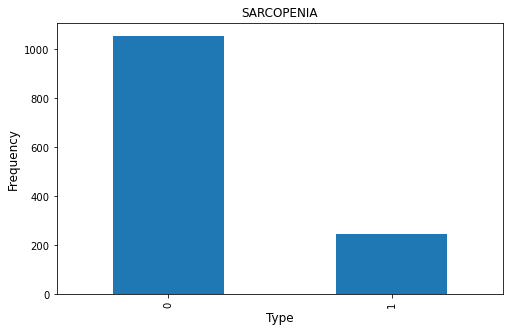

In [23]:
#distribution of target variable
import matplotlib.pyplot as plt

df_base = pd.concat([X,y],axis=1)
plt.figure(figsize=(8,5))
df_base["SARCOPENIA_new"].value_counts().plot(kind='bar')
plt.title('SARCOPENIA')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()


Data is imbalanced. We will handle this imbalance, later in the pipeline.

In [24]:
#extract categorical features
cat_cols = X.select_dtypes(include='object').columns
cat_cols

Index(['  Alcohol', 'Gender', 'Anti-HT drug type_new', 'Education_new',
       'Occupation_new', 'Working Status_new', 'Exercise_new',
       'Smoking (packet/year)_new'],
      dtype='object')

In [25]:
#extract numerical features
num_cols = X.select_dtypes(exclude='object').columns
num_cols

Index(['Age', 'DM ', 'HT duration_new', 'MMSE_new', 'Weight_new', 'Height_new',
       'Waist_new', 'Hip_new', 'Smoking_new', 'DM duration_new', 'İnsülin_new',
       'Hiperlipidemi_new', 'Dyslipidemia duration_new', 'KAH_new',
       'KAH duration_new', 'Hipotiroidi_new', 'ASTIM_new', 'KOAH_new',
       'OP_new', 'HT_new', 'LowCST_new', 'CST_new', 'Gait speed_new',
       'Low grip strength_new', 'Grip strength_new', 'STAR_new', 'BMI_new'],
      dtype='object')

In [26]:
#df_base.head()

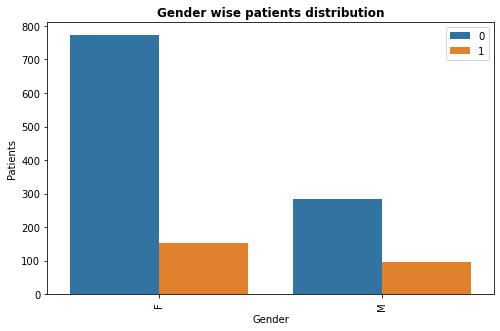

In [27]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(8,5))
sns.countplot(data = df_base, x='Gender', order=df_base['Gender'].value_counts().index,hue='SARCOPENIA_new')
plt.xticks(rotation=90)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Patients', fontsize=10)
plt.title('Gender wise patients distribution', fontsize=12, fontweight='bold')
plt.legend(loc="upper right")
plt.show()

The above plot shows that higher number of Females are Not having Sarcopenia.

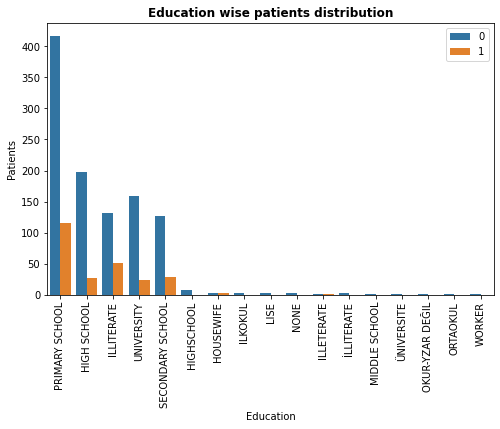

In [28]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(8,5))
sns.countplot(data = df_base, x='Education_new', order=df_base['Education_new'].value_counts().index,hue='SARCOPENIA_new')
plt.xticks(rotation=90)
plt.xlabel('Education', fontsize=10)
plt.ylabel('Patients', fontsize=10)
plt.title('Education wise patients distribution', fontsize=12, fontweight='bold')
plt.legend(loc="upper right")
plt.show()

The above plot shows that higher education leads to less cases of confirmed Sarcopenia patients.

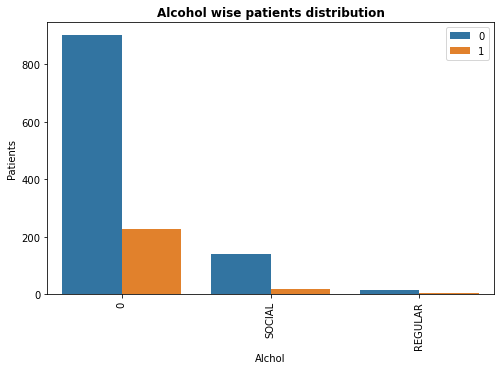

In [29]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(8,5))
sns.countplot(data = df_base, x='  Alcohol', order=df_base['  Alcohol'].value_counts().index,hue='SARCOPENIA_new')
plt.xticks(rotation=90)
plt.xlabel('Alchol', fontsize=10)
plt.ylabel('Patients', fontsize=10)
plt.title('Alcohol wise patients distribution', fontsize=12, fontweight='bold')
plt.legend(loc="upper right")
plt.show()

The above plot shows that less alcohol consumption leads to less cases of confirmed Sarcopenia patients.

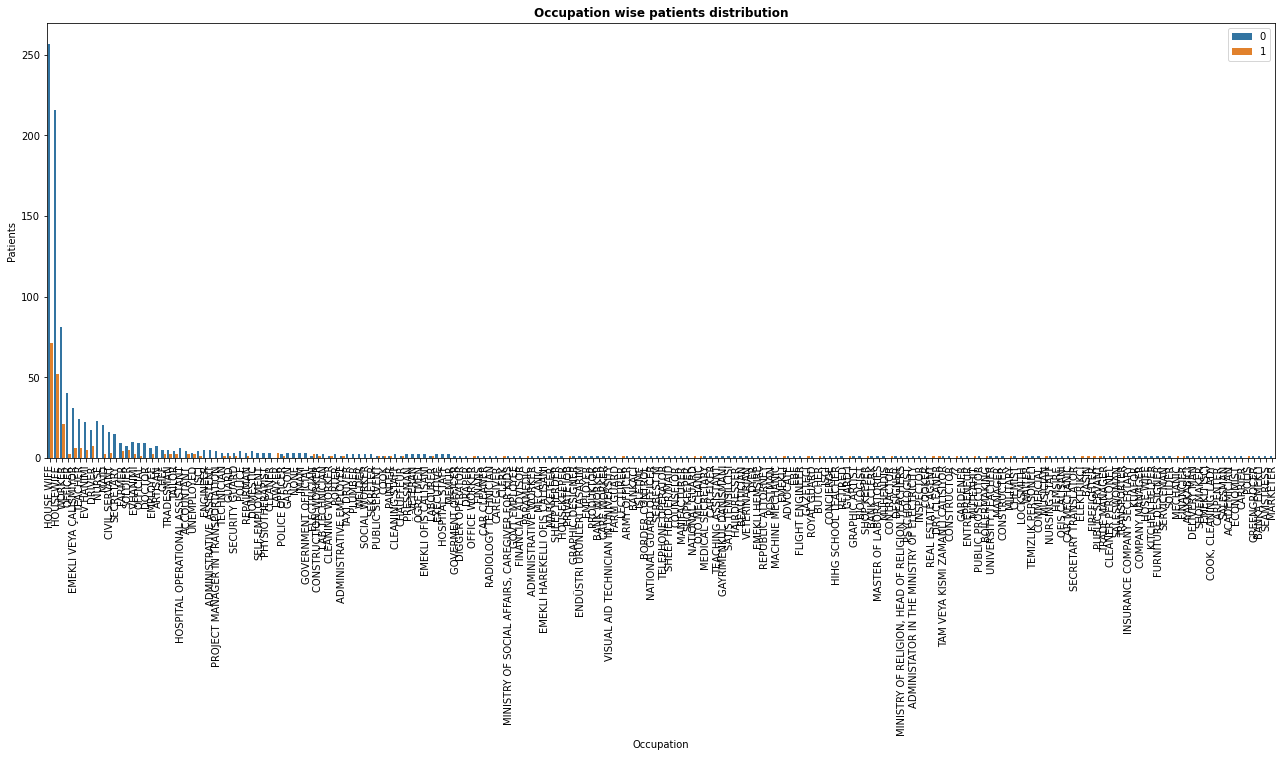

In [30]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(22,8))
sns.countplot(data = df_base, x='Occupation_new', order=df_base['Occupation_new'].value_counts().index,hue='SARCOPENIA_new')
plt.xticks(rotation=90)
plt.xlabel('Occupation', fontsize=10)
plt.ylabel('Patients', fontsize=10)
plt.title('Occupation wise patients distribution', fontsize=12, fontweight='bold')
plt.legend(loc="upper right")
plt.show() 

Above plot shows higher concentraion of Sarcopenia cases for specific group of occupation.

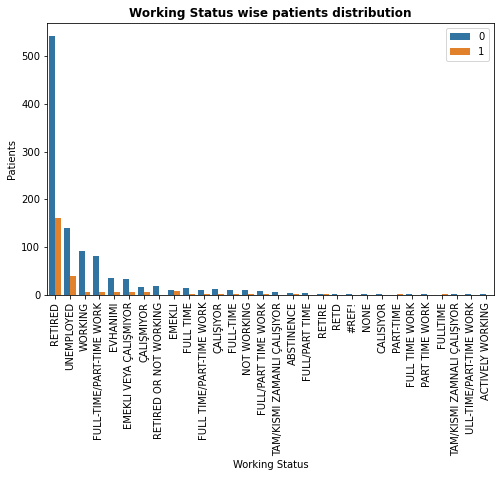

In [31]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(8,5))
sns.countplot(data = df_base, x='Working Status_new', order=df_base['Working Status_new'].value_counts().index,hue='SARCOPENIA_new')
plt.xticks(rotation=90)
plt.xlabel('Working Status', fontsize=10)
plt.ylabel('Patients', fontsize=10)
plt.title('Working Status wise patients distribution', fontsize=12, fontweight='bold')
plt.legend(loc="upper right")
plt.show() 

Above plot shows higher concentraion of Sarcopenia cases for retired and unemployed group.

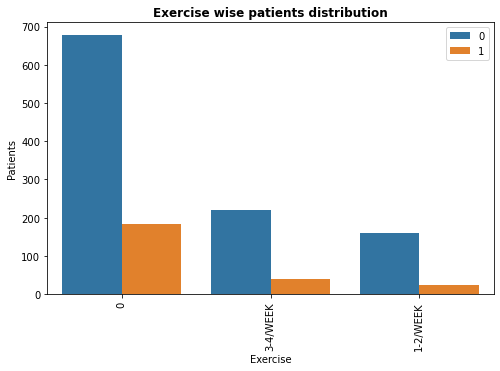

In [32]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(8,5))
sns.countplot(data = df_base, x='Exercise_new', order=df_base['Exercise_new'].value_counts().index,hue='SARCOPENIA_new')
plt.xticks(rotation=90)
plt.xlabel('Exercise', fontsize=10)
plt.ylabel('Patients', fontsize=10)
plt.title('Exercise wise patients distribution', fontsize=12, fontweight='bold')
plt.legend(loc="upper right")
plt.show() 

Above plot shows less exercise leads to higher concentraion of Sarcopenia cases.

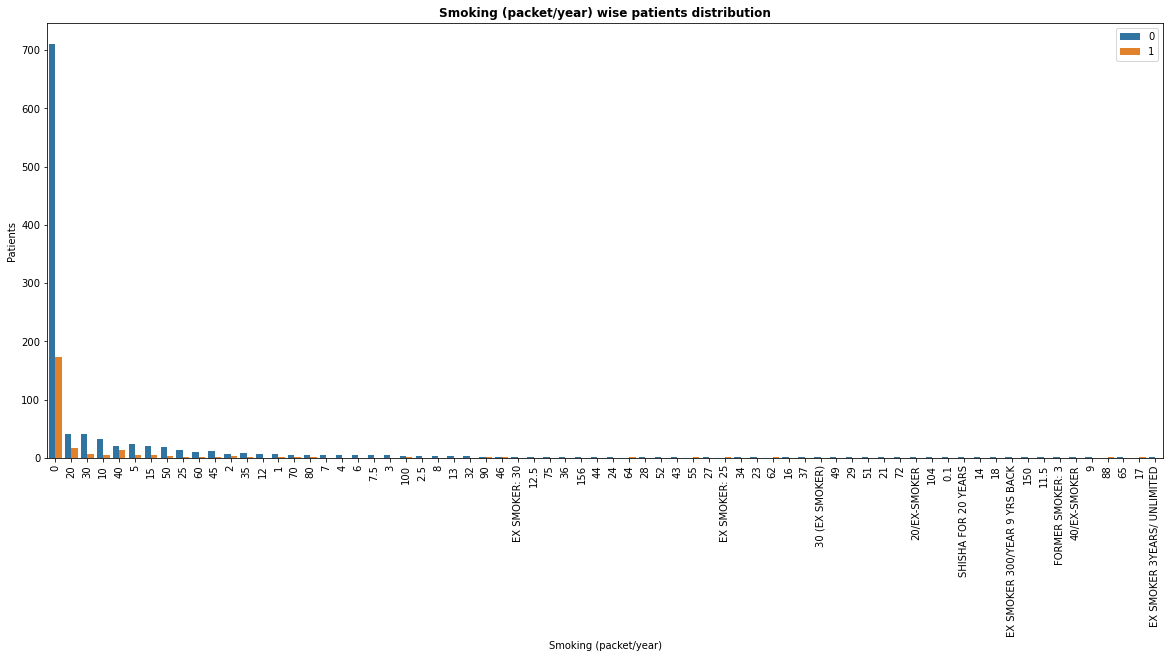

In [33]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(20,8))
sns.countplot(data = df_base, x='Smoking (packet/year)_new', order=df_base['Smoking (packet/year)_new'].value_counts().index,hue='SARCOPENIA_new')
plt.xticks(rotation=90)
plt.xlabel('Smoking (packet/year)', fontsize=10)
plt.ylabel('Patients', fontsize=10)
plt.title('Smoking (packet/year) wise patients distribution', fontsize=12, fontweight='bold')
plt.legend(loc="upper right")
plt.show() 

Above plot does not show much co-relation between smoking and Sarcopenia cases.

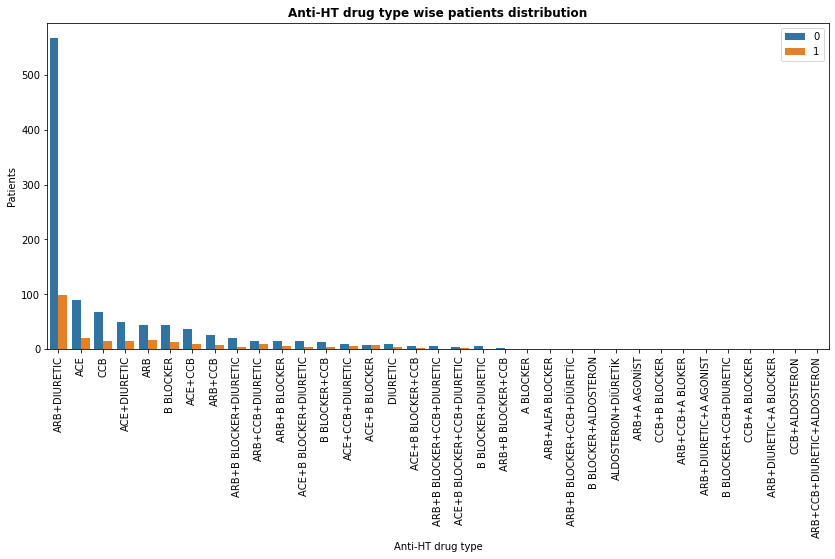

In [34]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(14,6))
sns.countplot(data = df_base, x='Anti-HT drug type_new', order=df_base['Anti-HT drug type_new'].value_counts().index,hue='SARCOPENIA_new')
plt.xticks(rotation=90)
plt.xlabel('Anti-HT drug type', fontsize=10)
plt.ylabel('Patients', fontsize=10)
plt.title('Anti-HT drug type wise patients distribution', fontsize=12, fontweight='bold')
plt.legend(loc="upper right")
plt.show() 

Above plot shows some Anti-HT drugs have higher impact on Sarcopenia cases.

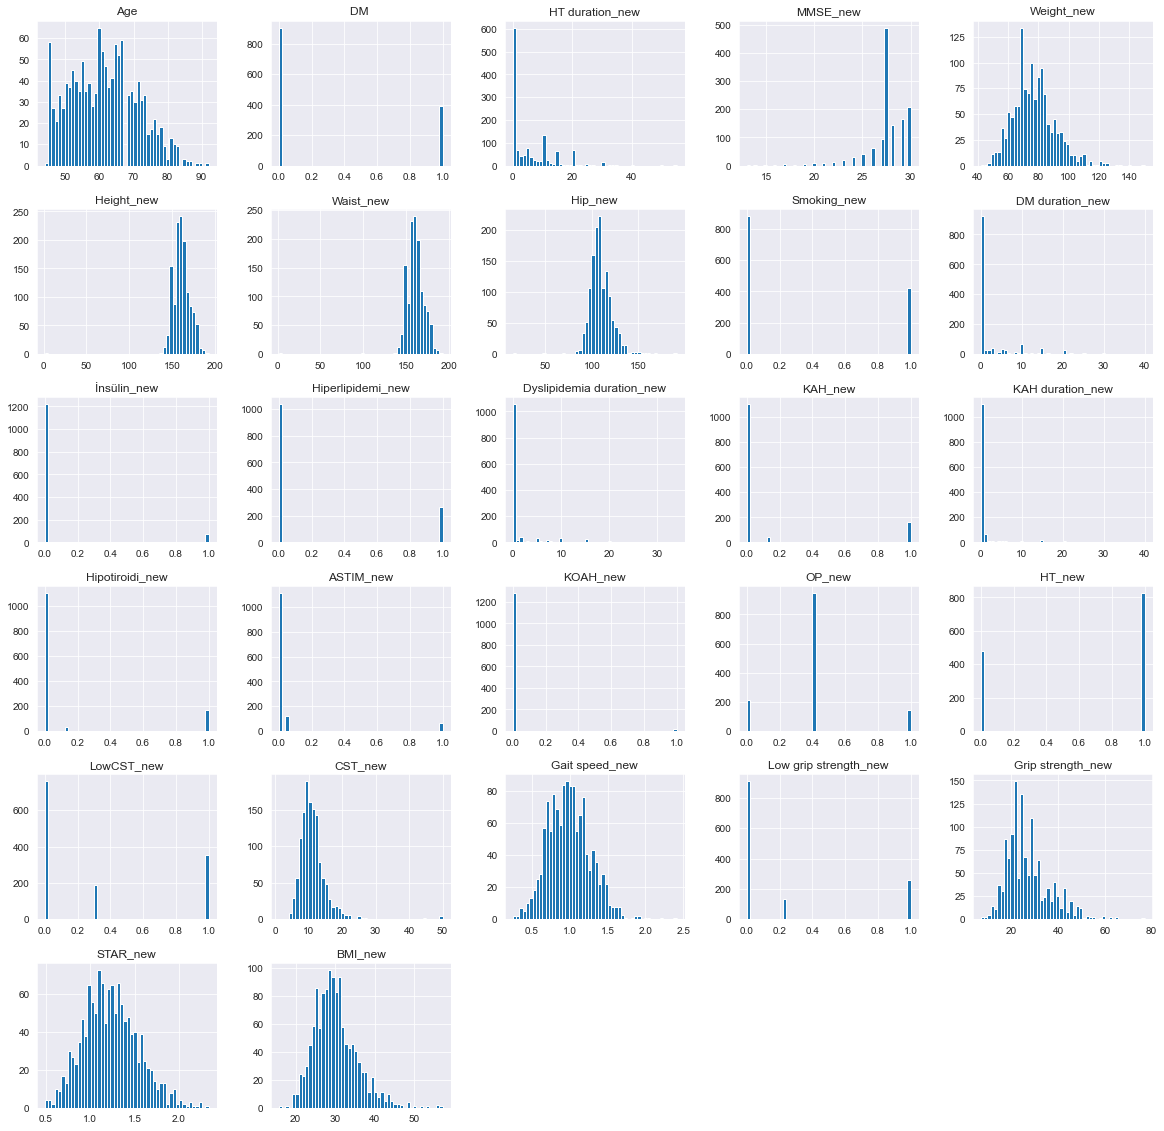

In [35]:
#plot histograms for all numerical independent features to understand the distribution
import seaborn as sns
sns.set_style('dark')
temp = df_base[num_cols]
temp.hist(bins=50,figsize=(20,20))
plt.show()

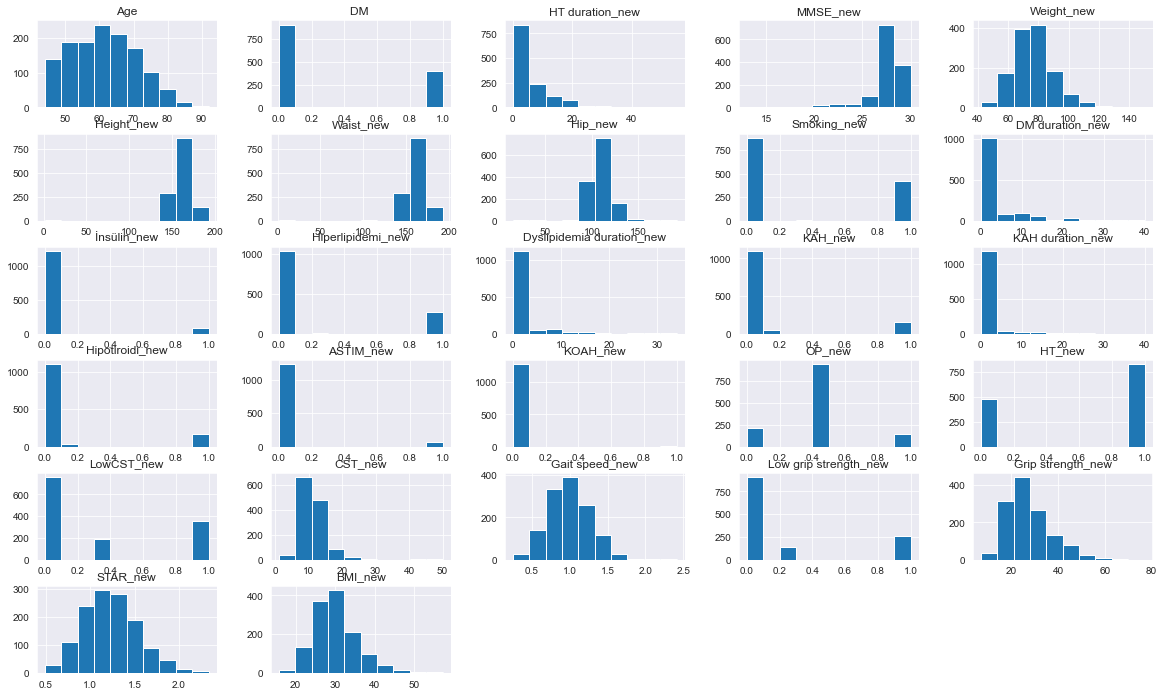

In [36]:
#test for normality
import matplotlib.pyplot as plt
X.hist(figsize=(20,12))
plt.show()

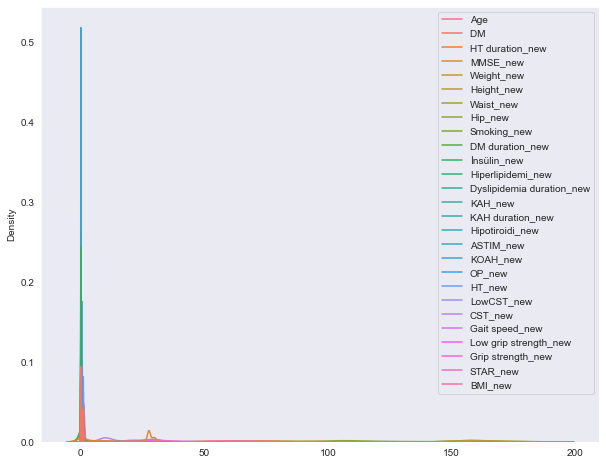

In [37]:
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.kdeplot(data=df_base[num_cols])
plt.show()

A KDE plot represents the probability distribution of the data values as the area under the plotted curve. The distributions are almost right-skewed(mean is greater than the median).

Since majority of the columns dont have normal distribution, we will use MinMaxScaler to scale the data later.

In [38]:
#cat_cols = X.select_dtypes(include='object')
#for c in list(cat_cols):
#    print(c,X[c].nunique())

In [39]:
#num_cols=X.select_dtypes(exclude='object')
#list(num_cols)

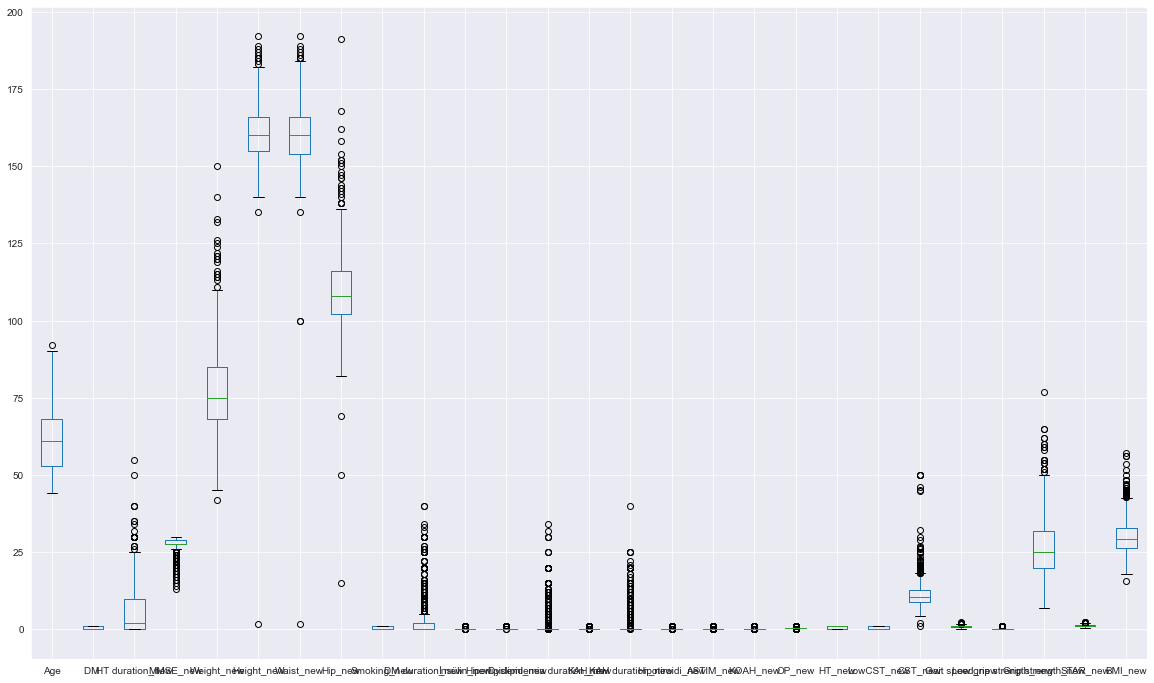

In [40]:
import matplotlib.pyplot as plt
X.boxplot(figsize=(20,12))
plt.show()

There are some outliers in the data, that we will handle later in the pipeline.

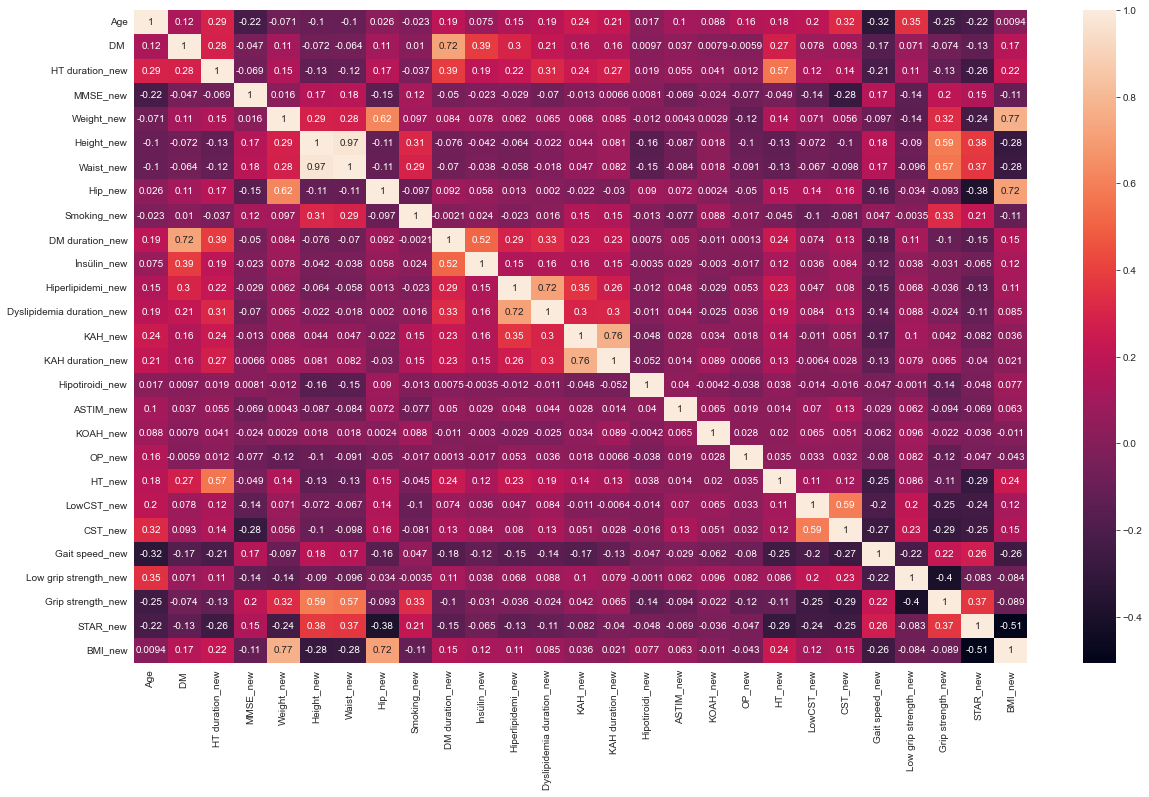

In [41]:
import seaborn as sns
plt.figure(figsize=(20,12))
corr = df_base.corr()
sns.heatmap(corr, annot=True)
plt.show()

A correlation heatmap is created to understand the linear relationship between different variables.

- Variables that have a Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.
- None of the variable having strong negative correlations.
- There are several variables that have no correlation and whose correlation value is near 0.


##### Outliers Handling

- We can use the IQR method of identifying outliers to set up a “fence” outside of Q1 and Q3.Any values that fall outside of this fence are considered outliers. 
- To build this fence we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3. 
- This gives us the minimum and maximum fence posts that we compare each observation to.
- Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers. 

In [42]:
df_categorical = X.loc[:, list(cat_cols)]
df_numerical = X.loc[:, list(num_cols)]


In [43]:
def outlier_detect(df):
    for i in df.describe().columns:
        
        Q1=df.describe().at['25%',i]
        
        Q3=df.describe().at['75%',i]
        
        IQR=Q3 - Q1
        
        LTV=Q1 - 1.5 * IQR
        
        UTV=Q3 + 1.5 * IQR
        
        x=np.array(df[i])
        
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
               
    return df


In [44]:
df_out = outlier_detect(df_numerical)

In [45]:
X=pd.concat([df_categorical,df_numerical],axis=1)

In [46]:
print(X.columns)
print(len(X.columns))

Index(['  Alcohol', 'Gender', 'Anti-HT drug type_new', 'Education_new',
       'Occupation_new', 'Working Status_new', 'Exercise_new',
       'Smoking (packet/year)_new', 'Age', 'DM ', 'HT duration_new',
       'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new', 'Hip_new',
       'Smoking_new', 'DM duration_new', 'İnsülin_new', 'Hiperlipidemi_new',
       'Dyslipidemia duration_new', 'KAH_new', 'KAH duration_new',
       'Hipotiroidi_new', 'ASTIM_new', 'KOAH_new', 'OP_new', 'HT_new',
       'LowCST_new', 'CST_new', 'Gait speed_new', 'Low grip strength_new',
       'Grip strength_new', 'STAR_new', 'BMI_new'],
      dtype='object')
35


In [47]:
X_trimmed = X.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
X_trimmed = X_trimmed.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
X_trimmed.columns

Index(['  Alcohol', 'Gender', 'Anti-HT drug type_new', 'Education_new',
       'Occupation_new', 'Working Status_new', 'Exercise_new',
       'Smoking (packet/year)_new', 'Age', 'DM ', 'HT duration_new',
       'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new', 'Hip_new',
       'Smoking_new', 'DM duration_new', 'İnsülin_new', 'Hiperlipidemi_new',
       'Dyslipidemia duration_new', 'KAH_new', 'KAH duration_new',
       'Hipotiroidi_new', 'ASTIM_new', 'KOAH_new', 'OP_new', 'HT_new',
       'LowCST_new', 'CST_new', 'Gait speed_new', 'Low grip strength_new',
       'Grip strength_new', 'STAR_new', 'BMI_new'],
      dtype='object')

##### Fetaure Encoding

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words. different types of categorical variables.

Different types of categorical variables:-
- Nominal categorical variables are those for which we do not have to worry about the arrangement of the categories.
- Ordinal categories are those in which we have to worry about the rank. These categories can be rearranged based on ranks.

Label Encoding - In this techniqu, ranks are provided based on the importance of the category. It refers to converting the labels into a numeric form so as to convert them into the machine-readable form. The problem with using this strategy is that they introduce relation/comparison between the variables.

OneHot Encoding - This method is applied to nominal categorical variables. In this technique, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. Though this approach eliminates the hierarchy/order issues but does have the downside of adding more columns to the data set. It can cause the number of columns to expand greatly if you have many unique values in a category column.

Ordinal Encoding - Ordinal encoding, which turns each label into an integer value and depicts the sequence of labels in the encoded data, is employed when the variables in the data are ordinal.

In [48]:
#display cardinality of categorical features
for c in list(cat_cols):
    print(c,X[c].nunique())

  Alcohol 3
Gender 2
Anti-HT drug type_new 35
Education_new 17
Occupation_new 206
Working Status_new 30
Exercise_new 3
Smoking (packet/year)_new 70


In [49]:
#One Hot encoding for low cardinal categorical features
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
ohe = OneHotEncoder()

cols = ['Gender','  Alcohol','Exercise_new']
cols_ohe= list()
for c in cols:
    c_ohe =pd.get_dummies(X_trimmed[c],prefix=c,drop_first=True)
    cols_ohe.append(c_ohe)

In [50]:
cols_ohe_df = pd.concat(cols_ohe, axis=1)
cols_ohe_df.shape

(1303, 5)

In [51]:
X_trimmed.shape

(1303, 35)

In [52]:
#combine one hot encoded features with original features
X_trimmed = pd.concat([X_trimmed,cols_ohe_df],axis=1)
X_trimmed.columns

Index(['  Alcohol', 'Gender', 'Anti-HT drug type_new', 'Education_new',
       'Occupation_new', 'Working Status_new', 'Exercise_new',
       'Smoking (packet/year)_new', 'Age', 'DM ', 'HT duration_new',
       'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new', 'Hip_new',
       'Smoking_new', 'DM duration_new', 'İnsülin_new', 'Hiperlipidemi_new',
       'Dyslipidemia duration_new', 'KAH_new', 'KAH duration_new',
       'Hipotiroidi_new', 'ASTIM_new', 'KOAH_new', 'OP_new', 'HT_new',
       'LowCST_new', 'CST_new', 'Gait speed_new', 'Low grip strength_new',
       'Grip strength_new', 'STAR_new', 'BMI_new', 'Gender_M',
       '  Alcohol_REGULAR', '  Alcohol_SOCIAL', 'Exercise_new_1-2/WEEK',
       'Exercise_new_3-4/WEEK'],
      dtype='object')

In [53]:
#drop the original variables
X_trimmed = X_trimmed.drop(labels= ['Gender','  Alcohol','Exercise_new'],axis=1)
X_trimmed.columns

Index(['Anti-HT drug type_new', 'Education_new', 'Occupation_new',
       'Working Status_new', 'Smoking (packet/year)_new', 'Age', 'DM ',
       'HT duration_new', 'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new',
       'Hip_new', 'Smoking_new', 'DM duration_new', 'İnsülin_new',
       'Hiperlipidemi_new', 'Dyslipidemia duration_new', 'KAH_new',
       'KAH duration_new', 'Hipotiroidi_new', 'ASTIM_new', 'KOAH_new',
       'OP_new', 'HT_new', 'LowCST_new', 'CST_new', 'Gait speed_new',
       'Low grip strength_new', 'Grip strength_new', 'STAR_new', 'BMI_new',
       'Gender_M', '  Alcohol_REGULAR', '  Alcohol_SOCIAL',
       'Exercise_new_1-2/WEEK', 'Exercise_new_3-4/WEEK'],
      dtype='object')

In [54]:
#label encoding for higher cardinality categorical variables 
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
X_trimmed['Anti-HT drug type_new']=le.fit_transform(X_trimmed['Anti-HT drug type_new'])
X_trimmed['Occupation_new']=le.fit_transform(X_trimmed['Occupation_new'])
X_trimmed['Working Status_new'] = le.fit_transform(X_trimmed['Working Status_new'])
X_trimmed['Smoking (packet/year)_new']=le.fit_transform(X_trimmed['Smoking (packet/year)_new'])

X_trimmed.columns

Index(['Anti-HT drug type_new', 'Education_new', 'Occupation_new',
       'Working Status_new', 'Smoking (packet/year)_new', 'Age', 'DM ',
       'HT duration_new', 'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new',
       'Hip_new', 'Smoking_new', 'DM duration_new', 'İnsülin_new',
       'Hiperlipidemi_new', 'Dyslipidemia duration_new', 'KAH_new',
       'KAH duration_new', 'Hipotiroidi_new', 'ASTIM_new', 'KOAH_new',
       'OP_new', 'HT_new', 'LowCST_new', 'CST_new', 'Gait speed_new',
       'Low grip strength_new', 'Grip strength_new', 'STAR_new', 'BMI_new',
       'Gender_M', '  Alcohol_REGULAR', '  Alcohol_SOCIAL',
       'Exercise_new_1-2/WEEK', 'Exercise_new_3-4/WEEK'],
      dtype='object')

In [55]:
#Ordinal encoding for categorical feature with ordered data
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
X_trimmed['Education_new']=oe.fit_transform(X_trimmed['Education_new'].values.reshape(-1,1))
X_trimmed.head()

,Anti-HT drug type_new,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,...,Gait speed_new,Low grip strength_new,Grip strength_new,STAR_new,BMI_new,Gender_M,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK
0,22,0.0,139,20,0,64.0,0,0.0,27.519704,66.0,...,1.28,0.000000,28.0,1.00,27.40,0,0,0,0,0
1,22,11.0,101,21,0,53.0,0,0.0,27.519704,55.0,...,1.47,0.000000,16.0,1.84,24.40,0,0,0,0,0
2,22,5.0,101,21,0,56.0,0,1.0,27.519704,56.0,...,0.80,0.000000,23.0,1.48,36.00,0,0,0,0,0
3,30,5.0,103,26,0,58.0,1,2.0,27.519704,75.0,...,1.34,0.000000,23.0,1.12,29.30,0,0,0,0,0
4,22,3.0,72,29,36,55.0,0,0.0,30.000000,72.0,...,1.09,0.220412,21.0,1.45,29.21,0,0,0,1,0


## Split data into train and test

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_trimmed,y,test_size=0.20, random_state=7)
print((X_train.shape,y_train.shape),(X_test.shape,y_test.shape))

((1042, 37), (1042,)) ((261, 37), (261,))


In [57]:
cols = X_train.columns

##### Scaling 

- As we know most of the supervised and unsupervised learning methods make decisions according to the data sets applied to them and often the algorithms calculate the distance between the data points to make better inferences out of the data.

- In the machine learning algorithms if the values of the features are closer to each other there are chances for the algorithm to get trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower. 

- Hence we need to perform feature scaling as features of different scales can give a distorted picture of distance between data points.

- StandardScaler changes the shape of data while keeping data into range of 0 and 1. It can eliminate the outliers.

- The standard practice is to use StandardScaler for normally distributed data, otherwise use MinMaxScaler.

In [58]:
#Data scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
print((X_train.shape,y_train.shape) ,(X_test.shape,y_test.shape))

((1042, 37), (1042,)) ((261, 37), (261,))


In [59]:
X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)
print((X_train.shape,y_train.shape),(X_test.shape,y_test.shape))

((1042, 37), (1042,)) ((261, 37), (261,))


In [60]:
#save the train and test data to create the pipeline, according to the problem.
X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

In [61]:
import copy 
X_train_copy = copy.deepcopy(X_train)
X_test_copy = copy.deepcopy(X_test)
y_train_copy = copy.deepcopy(y_train)
y_test_copy = copy.deepcopy(y_test)

##### Variable Selection

Lasso is a regularization constraint introduced to the objective function of linear models in order to prevent overfitting of the predictive model to the data. The name Lasso stands for Least Absolute Shrinkage and Selection Operator.

It turns out that the Lasso regularization has the ability to set some coefficients to zero. This means that Lasso can be used for variable selection in machine learning. If the coefficients that multiply some features are 0, we can safely remove those features from the data. The remaining are the important features in the data.

Lasso was designed to improve the interpretability of machine learning models by reducing the number of features. Other regularization methods, like Ridge regression or elastic net, do not share this property.

In [62]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

lasso = SelectFromModel(LogisticRegression(C=1,penalty='l1',solver='liblinear'))

lasso.fit(X_train_copy,np.ravel(y_train_copy,order='C'))

#obtain a boolean vector with True for the features that have non-zero coefficients
lasso.get_support()

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
        True])

The best value of C, and thus, the best feature subset, can be determined with cross-validation

In [63]:
#identify the names of the set of features that will be retained 
cols2 = X_train_copy.columns[(lasso.get_support())]
cols2

Index(['Anti-HT drug type_new', 'Education_new', 'Occupation_new',
       'Smoking (packet/year)_new', 'Age', 'DM ', 'MMSE_new', 'Weight_new',
       'DM duration_new', 'LowCST_new', 'CST_new', 'Low grip strength_new',
       'Grip strength_new', 'STAR_new', 'BMI_new', 'Gender_M',
       'Exercise_new_3-4/WEEK'],
      dtype='object')

In [64]:
#identify the names of the set of features that will be removed 
X_train_copy.columns[(lasso.estimator_.coef_ == 0).ravel().tolist()]

Index(['Working Status_new', 'HT duration_new', 'Height_new', 'Waist_new',
       'Hip_new', 'Smoking_new', 'İnsülin_new', 'Hiperlipidemi_new',
       'Dyslipidemia duration_new', 'KAH_new', 'KAH duration_new',
       'Hipotiroidi_new', 'ASTIM_new', 'KOAH_new', 'OP_new', 'HT_new',
       'Gait speed_new', '  Alcohol_REGULAR', '  Alcohol_SOCIAL',
       'Exercise_new_1-2/WEEK'],
      dtype='object')

In [65]:
X_train_copy_fs = X_train_copy[cols2]
X_train_copy_fs.shape

(1042, 17)

In [66]:
X_test_copy_fs = X_test_copy[cols2]
X_test_copy_fs.shape

(261, 17)

In [67]:
y_train_copy.shape

(1042,)

In [68]:
y_test_copy.shape

(261,)

##### Imbalanced data handling

Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class).

Generally, the minority/positive class is the class of interest and we aim to achieve the best results in this class rather. If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.

In this case study, we have applied SMOTE.

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. 

The SMOTE algorithm works like this:

- Select a random sample from the minority group.
- Determine the k nearest neighbours for the observations in this sample.
= Then, using one of those neighbours, determine the vector between the current data point and the chosen neighbour.
- The vector is multiplied by a random number between 0 and 1.
- Add this to the current data point to get the synthetic data point.
    
This operation is essentially the same as moving the data point slightly in the direction of its neighbour. This ensures that our synthetic data point is not an exact replica of an existing data point, while also ensuring that it is not too dissimilar from known observations in our minority class.

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train_copy_fs,y_train_copy)
print((X_train_resampled.shape,y_train_resampled.shape),(X_test_copy_fs.shape,y_test_copy.shape))

((1694, 17), (1694,)) ((261, 17), (261,))


In [70]:
y_train_resampled.value_counts()

0    847
1    847
Name: SARCOPENIA_new, dtype: int64

In [71]:
#print shape of train and test data, after feature selction and imbalanced data handling
print((X_train_resampled.shape,y_train_resampled.shape),(X_test_copy_fs.shape,y_test_copy.shape))

((1694, 17), (1694,)) ((261, 17), (261,))


In [72]:
#print shape of train and test data, which will be used for manual feature selection 
print((X_train.shape,y_train.shape),(X_test.shape,y_test.shape))

((1042, 37), (1042,)) ((261, 37), (261,))


## Base Model Building

In [73]:
#build a basic logistic regression classifier
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1

LogisticRegression()

In [74]:
#fit on resampled data
lr1.fit(X_train_resampled,y_train_resampled)

LogisticRegression()

In [75]:
#make predictions on test data
y_pred_lr1 = lr1.predict(X_test_copy_fs)
y_pred_lr1=y_pred_lr1.astype("O")
y_pred_lr1 = pd.Series(y_pred_lr1)

In [76]:
#generate base model accuracy
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,roc_curve, auc, roc_auc_score

lr1_acc = accuracy_score(y_test_copy,y_pred_lr1)
print("Base LR-Accuracy:", lr1_acc)

Base LR-Accuracy: 0.8812260536398467


## Conclusion